## Importing Libraries & getting Data

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import random

In [2]:
from sklearn.datasets import make_blobs
X,y = make_blobs(centers=3,random_state=42)

<AxesSubplot:>

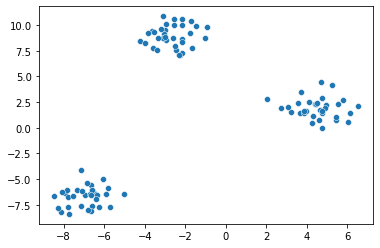

In [3]:
#X[:,0] --> this means all values and feature 0 
sns.scatterplot(x=X[:,0],y=X[:,1])

## Model Building

In [4]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=3,init='k-means++')
model.fit(X)

KMeans(n_clusters=3)

In [5]:
# y_gen is generated labels
y_gen = model.labels_

In [6]:
model.cluster_centers_

array([[ 4.49951001,  1.93892013],
       [-6.95170962, -6.67621669],
       [-2.66780392,  8.93576069]])

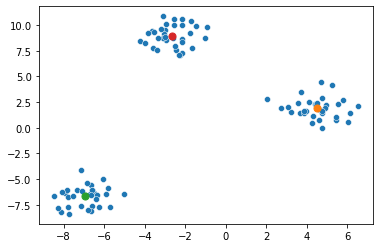

In [7]:
sns.scatterplot(x=X[:,0],y=X[:,1])

for center in model.cluster_centers_:
    plt.scatter(center[0],center[1],s=50)

##  Inertia is the sum of distances of all the points within a cluster from the centroid of that cluster.

In [8]:
model.inertia_

171.91098459057724

## Plotting inertia-vs-clusters graph (aka Elbow Curve) to find the optimal amount of clusters for the dataset

In [9]:
L=[]
for i in range(1,20):
    model = KMeans(n_clusters=i , init='k-means++')
    model.fit(X)
    L.append(model.inertia_)

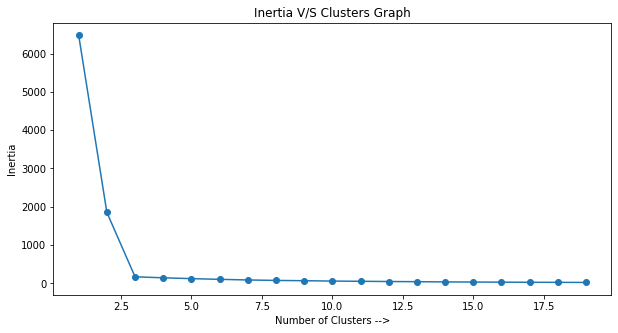

In [10]:
frame = ({'i':range(1,20),'L':L})

plt.figure(figsize=(10,5))
plt.plot(frame['i'], frame['L'], marker='o')
plt.xlabel("Number of Clusters -->")
plt.ylabel("Inertia")
plt.title("Inertia V/S Clusters Graph")
plt.show()

## The Cluster value where the decrease in inertia value becomes constant will be the right cluster value for our data.
## In our case , cluster value can be : 3,4